In [125]:
import pandas as pd

In [126]:
import keras

In [127]:
import tensorflow

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv("SUNTV.NS1.csv")

In [130]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-09-25,312.524994,317.75,311.250000,311.962494,211.848480,93824.0
1,2006-09-26,313.750000,316.00,309.000000,311.712494,211.678833,99596.0
2,2006-09-27,314.912506,317.00,310.250000,311.262512,211.373276,96308.0
3,2006-09-28,319.750000,319.75,306.524994,312.812500,212.425797,158932.0
4,2006-09-29,313.750000,324.75,313.750000,320.862488,217.892517,162428.0


In [131]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3925,2022-08-17,488.399994,494.149994,480.149994,481.450012,476.635529,1026508.0
3926,2022-08-18,481.600006,488.799988,477.600006,479.549988,474.754486,687377.0
3927,2022-08-19,482.000000,493.000000,479.899994,485.950012,481.090515,2385192.0
3928,2022-08-22,488.200012,504.899994,482.450012,500.000000,495.000000,4019224.0
3929,2022-08-23,494.899994,501.350006,484.000000,485.850006,485.850006,1892866.0


<AxesSubplot:>

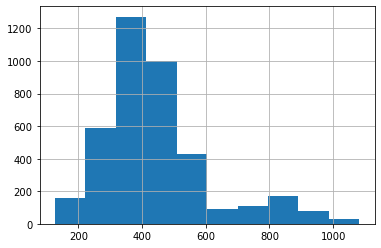

In [132]:
df["Open"].hist()

<AxesSubplot:>

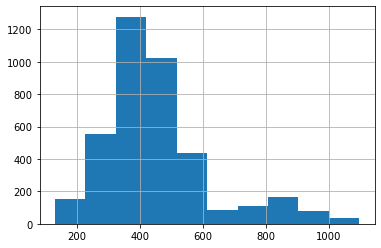

In [133]:
df["High"].hist()

<AxesSubplot:>

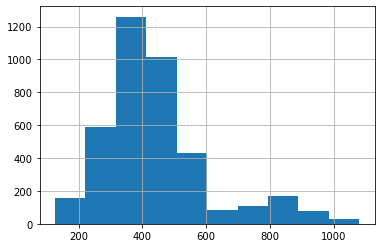

In [134]:
df["Close"].hist()

In [135]:
df1 = df.reset_index()['Close']

In [136]:
df1.shape

(3930,)

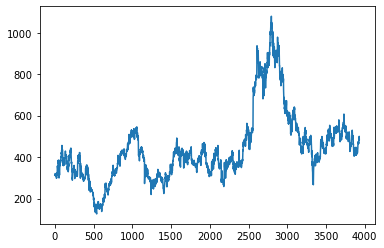

In [137]:
plt.plot(df1)

In [138]:
import numpy as np

In [139]:
df1

0       311.962494
1       311.712494
2       311.262512
3       312.812500
4       320.862488
           ...    
3925    481.450012
3926    479.549988
3927    485.950012
3928    500.000000
3929    485.850006
Name: Close, Length: 3930, dtype: float64

In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [141]:
df1.shape

(3930, 1)

In [142]:
print(df1)

[[0.19501861]
 [0.1947563 ]
 [0.19428415]
 ...
 [0.37757726]
 [0.39231939]
 [0.37747232]]


In [143]:
## TRAIN TEST ABD SPLIT

In [144]:
training_size = int(len(df1)*0.65)
test_size= len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]


In [145]:
training_size, test_size

(2554, 1376)

In [146]:
#Now splitting the dataset for time series and making it into a matrix

In [147]:
def create_dataset (dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)
        

In [148]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [149]:
print(X_train.shape), print(y_train.shape)

(2453, 100)
(2453,)


(None, None)

In [150]:
print(X_test.shape), print(y_test.shape)

(1275, 100)
(1275,)


(None, None)

In [151]:
#Now modelling it for LSTM
#For LSTM the shape should be of 3-d, so we are adding 1 at the end of the train and test.
#The reshaped input should be in the form of [samples,timesteps,features]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



In [152]:
#Creating a Stacked LSTM model


In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM



In [154]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = "adam")

In [155]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
39/39 [==============================] - 12s 189ms/step - loss: nan - val_loss: nan
Epoch 2/100
39/39 [==============================] - 5s 131ms/step - loss: nan - val_loss: nan
Epoch 3/100
39/39 [==============================] - 6s 163ms/step - loss: nan - val_loss: nan
Epoch 4/100
39/39 [==============================] - 7s 186ms/step - loss: nan - val_loss: nan
Epoch 5/100
39/39 [==============================] - 5s 134ms/step - loss: nan - val_loss: nan
Epoch 6/100
39/39 [==============================] - 7s 190ms/step - loss: nan - val_loss: nan
Epoch 7/100
39/39 [==============================] - 7s 175ms/step - loss: nan - val_loss: nan
Epoch 8/100
39/39 [==============================] - 7s 174ms/step - loss: nan - val_loss: nan
Epoch 9/100
10/39 [======>.......................] - ETA: 4s - loss: nan

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)



In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))


In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))


In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)


In [ ]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
len(df1)


In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [ ]:
df3=scaler.inverse_transform(df3).tolist()


In [ ]:
plt.plot(df3)
